<a href="https://colab.research.google.com/github/rohinishimpatwar/The-NLP-News-Sentiment-Trading-Strategy/blob/master/Data/Part1_Data_Prepare_Label_Company_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('/Users/yangsu/Downloads/')

In [0]:
news = pd.read_csv('clean_news_dataset.csv')
news = news.iloc[-10000:,]

10000


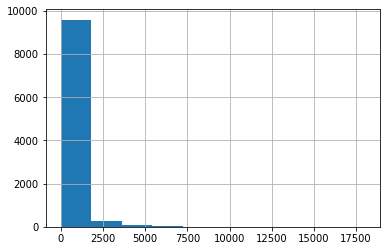

In [0]:
news = news.dropna()
news['text'] = news['text'].astype('str')
def word_count(s):
    a = s.split(' ')
    return len(a)

news['word_num'] = news['text'].apply(word_count)
news['word_num'].hist()
print(len(news))

In [0]:
comp_industry = pd.read_csv('sp500companies_industry.csv')
comp_ind = comp_industry[['Symbol', 'Security', 'GICS Sector']]
print(comp_ind.head())
tickers = np.array(comp_ind.Symbol)
names = np.array(comp_ind.Security)
sector = np.array(comp_ind['GICS Sector'])

  Symbol             Security             GICS Sector
0    MMM           3M Company             Industrials
1    ABT  Abbott Laboratories             Health Care
2   ABBV          AbbVie Inc.             Health Care
3   ABMD          ABIOMED Inc             Health Care
4    ACN        Accenture plc  Information Technology


In [0]:
# I use "|" as a seperater instead of "," because some company names contains ","

news['Company'] = ''
for comp in names:
    news['Mask'] = news['text'].str.contains(comp)
    news['Company'] = np.where( news['Mask'] == True, news['Company'].apply(lambda x: x + comp + '|' ),
                               news['Company'].apply(lambda x: x + '') )   

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
# I don`t think it`s a good idea to search by ticker, because it`s too short, and sometimes they capitalize the text as well.
# I`ll leave this part of code here for now, in case we are short on observations.

# news['Ticker'] = ''
# for ticker in tickers:
    # news['Mask'] = news['np.where( news['Mask'] == True, news['Ticker'].apply(lambda x: x + ' , ' + ticker),
                               # news['Ticker'].apply(lambda x: x + '') )  

In [0]:
news = news.drop('Mask', axis = 1)
ind_news = news[news['Company'] != '']


In [0]:
def Convert(string): 
    li = list(string.split("|"))
    return li 
ind_news['Company'] = ind_news['Company'].apply(Convert)
ind_news

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,published,title,text,word_num,Company
296244,296244,2018-05-10T19:10:00.000+03:00,JPMorgan Applies to Launch Joint-Venture Broke...,JPMorgan Chase & Co. is seeking approval from ...,90,"[JPMorgan Chase & Co., ]"
296257,296257,2018-05-26T16:28:00.000+03:00,Should Trump Care about Xi’s “Made in China 20...,By Clay Chandler 9:28 AM EDT\nIt’s on! It’s of...,1324,"[E*Trade, ]"
296260,296260,2018-05-03T23:00:00.000+03:00,Linda Forry Named Eversource Trustee,"HARTFORD, Conn. & BOSTON--(BUSINESS WIRE)-- Ev...",444,"[Eversource Energy, ]"
296267,296267,2018-05-10T16:00:00.000+03:00,"P&F Industries, Inc. Reports For The Three Mon...","MELVILLE, N.Y., May 10, 2018 /PRNewswire/ -- P...",4281,"[E*Trade, Home Depot, Stanley Black & Decker, ]"
296274,296274,2018-05-01T13:16:00.000+03:00,BP flags possible dividend boost as profits surge,"May 1, 2018 / 6:13 AM / Updated an hour ago BP...",671,"[Morgan Stanley, ]"
...,...,...,...,...,...,...
306216,306216,2018-05-23T17:53:00.000+03:00,Why the world needs more than one Ebola vaccine,"May 23, 2018 / 2:57 PM / Updated 3 hours ago W...",1107,"[Johnson & Johnson, ]"
306218,306218,2018-05-10T17:20:00.000+03:00,US STOCKS-Wall St rises as CPI data cools infl...,"May 10, 2018 / 2:23 PM / Updated 3 hours ago U...",481,"[Morgan Stanley, Wells Fargo, ]"
306219,306219,2018-05-01T09:36:00.000+03:00,'We're in the Money' - Sainsbury's CEO filmed ...,"May 1, 2018 / 6:37 AM / Updated 7 hours ago 'W...",262,"[Walmart, ]"
306224,306224,2018-05-09T00:01:00.000+03:00,Ocular Therapeutix™ Reports First Quarter 2018...,Targeting DEXTENZA™ NDA Resubmission in the Se...,2164,"[Regeneron Pharmaceuticals, ]"


In [0]:
ind_news = pd.concat([ind_news, pd.DataFrame(ind_news.Company.values.tolist(), ind_news.index).add_prefix('company_')], axis = 1)
ind_news

,Unnamed: 0,published,title,text,word_num,Company,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7
296244,296244,2018-05-10T19:10:00.000+03:00,JPMorgan Applies to Launch Joint-Venture Broke...,JPMorgan Chase & Co. is seeking approval from ...,90,"[JPMorgan Chase & Co., ]",JPMorgan Chase & Co.,,None,None,None,None,None,None
296257,296257,2018-05-26T16:28:00.000+03:00,Should Trump Care about Xi’s “Made in China 20...,By Clay Chandler 9:28 AM EDT\nIt’s on! It’s of...,1324,"[E*Trade, ]",E*Trade,,None,None,None,None,None,None
296260,296260,2018-05-03T23:00:00.000+03:00,Linda Forry Named Eversource Trustee,"HARTFORD, Conn. & BOSTON--(BUSINESS WIRE)-- Ev...",444,"[Eversource Energy, ]",Eversource Energy,,None,None,None,None,None,None
296267,296267,2018-05-10T16:00:00.000+03:00,"P&F Industries, Inc. Reports For The Three Mon...","MELVILLE, N.Y., May 10, 2018 /PRNewswire/ -- P...",4281,"[E*Trade, Home Depot, Stanley Black & Decker, ]",E*Trade,Home Depot,Stanley Black & Decker,,None,None,None,None
296274,296274,2018-05-01T13:16:00.000+03:00,BP flags possible dividend boost as profits surge,"May 1, 2018 / 6:13 AM / Updated an hour ago BP...",671,"[Morgan Stanley, ]",Morgan Stanley,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306216,306216,2018-05-23T17:53:00.000+03:00,Why the world needs more than one Ebola vaccine,"May 23, 2018 / 2:57 PM / Updated 3 hours ago W...",1107,"[Johnson & Johnson, ]",Johnson & Johnson,,None,None,None,None,None,None
306218,306218,2018-05-10T17:20:00.000+03:00,US STOCKS-Wall St rises as CPI data cools infl...,"May 10, 2018 / 2:23 PM / Updated 3 hours ago U...",481,"[Morgan Stanley, Wells Fargo, ]",Morgan Stanley,Wells Fargo,,None,None,None,None,None
306219,306219,2018-05-01T09:36:00.000+03:00,'We're in the Money' - Sainsbury's CEO filmed ...,"May 1, 2018 / 6:37 AM / Updated 7 hours ago 'W...",262,"[Walmart, ]",Walmart,,None,None,None,None,None,None
306224,306224,2018-05-09T00:01:00.000+03:00,Ocular Therapeutix™ Reports First Quarter 2018...,Targeting DEXTENZA™ NDA Resubmission in the Se...,2164,"[Regeneron Pharmaceuticals, ]",Regeneron Pharmaceuticals,,None,None,None,None,None,None


In [0]:
# We have 1372 pieces of news that have company names, woo-hoo!

In [0]:
# Need to match industry to each company here

def get_industry(sector_list, company_list, company_name):
    industry =[]
    for name in company_name:
        if name != '':
            industry.append(sector_list[list(company_list).index(name)])
    return industry

list_of_companies = list(ind_news['Company'])
industry_list = []
for company in ind_news['Company']:
    industry_list.append(get_industry(sector, names, company))

ind_news['Industry'] = industry_list 

ind_news = pd.concat([ind_news, pd.DataFrame(ind_news.Industry.values.tolist(), ind_news.index).add_prefix('industry_')], axis = 1)
ind_news

,Unnamed: 0,published,title,text,word_num,Company,company_0,company_1,company_2,company_3,...,company_6,company_7,Industry,industry_0,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6
296244,296244,2018-05-10T19:10:00.000+03:00,JPMorgan Applies to Launch Joint-Venture Broke...,JPMorgan Chase & Co. is seeking approval from ...,90,"[JPMorgan Chase & Co., ]",JPMorgan Chase & Co.,,None,None,...,None,None,[Financials],Financials,None,None,None,None,None,None
296257,296257,2018-05-26T16:28:00.000+03:00,Should Trump Care about Xi’s “Made in China 20...,By Clay Chandler 9:28 AM EDT\nIt’s on! It’s of...,1324,"[E*Trade, ]",E*Trade,,None,None,...,None,None,[Financials],Financials,None,None,None,None,None,None
296260,296260,2018-05-03T23:00:00.000+03:00,Linda Forry Named Eversource Trustee,"HARTFORD, Conn. & BOSTON--(BUSINESS WIRE)-- Ev...",444,"[Eversource Energy, ]",Eversource Energy,,None,None,...,None,None,[Utilities],Utilities,None,None,None,None,None,None
296267,296267,2018-05-10T16:00:00.000+03:00,"P&F Industries, Inc. Reports For The Three Mon...","MELVILLE, N.Y., May 10, 2018 /PRNewswire/ -- P...",4281,"[E*Trade, Home Depot, Stanley Black & Decker, ]",E*Trade,Home Depot,Stanley Black & Decker,,...,None,None,"[Financials, Consumer Discretionary, Industrials]",Financials,Consumer Discretionary,Industrials,None,None,None,None
296274,296274,2018-05-01T13:16:00.000+03:00,BP flags possible dividend boost as profits surge,"May 1, 2018 / 6:13 AM / Updated an hour ago BP...",671,"[Morgan Stanley, ]",Morgan Stanley,,None,None,...,None,None,[Financials],Financials,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306216,306216,2018-05-23T17:53:00.000+03:00,Why the world needs more than one Ebola vaccine,"May 23, 2018 / 2:57 PM / Updated 3 hours ago W...",1107,"[Johnson & Johnson, ]",Johnson & Johnson,,None,None,...,None,None,[Health Care],Health Care,None,None,None,None,None,None
306218,306218,2018-05-10T17:20:00.000+03:00,US STOCKS-Wall St rises as CPI data cools infl...,"May 10, 2018 / 2:23 PM / Updated 3 hours ago U...",481,"[Morgan Stanley, Wells Fargo, ]",Morgan Stanley,Wells Fargo,,None,...,None,None,"[Financials, Financials]",Financials,Financials,None,None,None,None,None
306219,306219,2018-05-01T09:36:00.000+03:00,'We're in the Money' - Sainsbury's CEO filmed ...,"May 1, 2018 / 6:37 AM / Updated 7 hours ago 'W...",262,"[Walmart, ]",Walmart,,None,None,...,None,None,[Consumer Staples],Consumer Staples,None,None,None,None,None,None
306224,306224,2018-05-09T00:01:00.000+03:00,Ocular Therapeutix™ Reports First Quarter 2018...,Targeting DEXTENZA™ NDA Resubmission in the Se...,2164,"[Regeneron Pharmaceuticals, ]",Regeneron Pharmaceuticals,,None,None,...,None,None,[Health Care],Health Care,None,None,None,None,None,None


In [0]:
ind_news.to_csv('news_with_all_labels.csv')